In [30]:
# Add ldcpy root to system path
import sys

sys.path.insert(0, '../../../')

# Import ldcpy package
# Autoreloads package everytime the package is called, so changes to code will be reflected in the notebook if the above sys.path.insert(...) line is uncommented.
%load_ext autoreload
%autoreload 2
import ldcpy

# display the plots in this notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
absorb_col = ldcpy.open_datasets("cam-fv",
    ["ABSORB"],
    [
        "/Users/abaker/alli/code-repo/test-data/new_absorb/orig.absorb.nc",
        "/Users/abaker/alli/code-repo/test-data/new_absorb/p12.ex.nc",
                "/Users/abaker/alli/code-repo/test-data/new_absorb/p12.fill.nc",
        "/Users/abaker/alli/code-repo/test-data/new_absorb/p12.fix.nc",
                "/Users/abaker/alli/code-repo/test-data/new_absorb/p12.lon.nc",      
        "/Users/abaker/alli/code-repo/test-data/copy_absorb/zfp_p12.absorb.nc",


    ],
    ["orig", "comp-ex", "comp-fill", "comp-fix", "comp-lon", "zfp-12"],
    chunks={"time": 1},
)

dataset size in GB 0.40



In [35]:
ab0 = absorb_col.isel(time=0)
ldcpy.compare_stats(ab0, "ABSORB", ["orig", "comp-ex","comp-fill", "comp-fix", "comp-lon", "zfp-12"], significant_digits = 7)

,orig,comp-ex,comp-fill,comp-fix,comp-lon,zfp-12
mean,5.608782e-07,5.608758e-07,5.608758e-07,5.608758e-07,5.608758e-07,5.608758e-07
variance,8.211551e-12,8.211512e-12,8.211512e-12,8.211512e-12,8.211512e-12,8.211512e-12
standard deviation,2.86558e-06,2.865574e-06,2.865574e-06,2.865574e-06,2.865574e-06,2.865574e-06
min value,2.012724e-13,2.015055e-13,2.015055e-13,2.015055e-13,2.015055e-13,2.015055e-13
max value,0.0003357234,0.000336051,0.000336051,0.000336051,0.000336051,0.000336051
probability positive,1,1,1,1,1,1
number of zeros,0,0,0,0,0,0


,comp-ex,comp-fill,comp-fix,comp-lon,zfp-12
max abs diff,6.979826e-07,6.979826e-07,6.979826e-07,6.979826e-07,6.979826e-07
min abs diff,0,0,0,0,0
mean abs diff,4.861534e-10,4.861534e-10,4.861534e-10,4.861534e-10,4.861534e-10
mean squared diff,5.671484e-24,5.671484e-24,5.671484e-24,5.671484e-24,5.671484e-24
root mean squared diff,3.95382e-09,3.95382e-09,3.95382e-09,3.95382e-09,3.95382e-09
normalized root mean squared diff,1.012671e-05,1.012671e-05,1.012671e-05,1.012671e-05,1.012671e-05
normalized max pointwise error,0.001919071,0.001919071,0.001919071,0.001919071,0.001919071
pearson correlation coefficient,0.9999993,0.9999993,0.9999993,0.9999993,0.9999993
ks p-value,1,1,1,1,1
spatial relative error(% > 0.0001),90.65905,90.65905,90.65905,90.65905,90.65905


In [33]:
ab0_orig = absorb_col["ABSORB"].isel(time=0).sel(collection="orig").compute()
ab0_comp = absorb_col["ABSORB"].isel(time=0).sel(collection="zfp-12").compute()

In [27]:
ab0_orig.data

array([[[2.38171635e-12, 2.38171635e-12, 2.38171635e-12, ...,
         2.38171635e-12, 2.38171635e-12, 2.38171635e-12],
        [2.38080692e-12, 2.37991744e-12, 2.37986735e-12, ...,
         2.38123605e-12, 2.38178336e-12, 2.38059529e-12],
        [2.38189026e-12, 2.38038127e-12, 2.37988210e-12, ...,
         2.38639859e-12, 2.38360894e-12, 2.38294237e-12],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[1.14635055e-11, 1.14635055e-11, 1.14635055e-11, ...,
         1.14635055e-11, 1.14635055e-11, 1.14635055e-11],
        [1.11156319e-11, 1.11108666e-11, 1.11057621e-11, ...,
         1.11272059e-11, 1.11233800e-11, 1.11197206e-11],
        [1.08142549e-11, 

In [28]:
ab0_comp.data

array([[[2.3803182e-12, 2.3803182e-12, 2.3803182e-12, ...,
         2.3803182e-12, 2.3803182e-12, 2.3803182e-12],
        [2.3803182e-12, 2.3803182e-12, 2.3803182e-12, ...,
         2.3803182e-12, 2.3803182e-12, 2.3803182e-12],
        [2.3803182e-12, 2.3803182e-12, 2.3803182e-12, ...,
         2.3838709e-12, 2.3838709e-12, 2.3838709e-12],
        ...,
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan]],

       [[1.1468160e-11, 1.1468160e-11, 1.1468160e-11, ...,
         1.1468160e-11, 1.1468160e-11, 1.1468160e-11],
        [1.1112888e-11, 1.1112888e-11, 1.1112888e-11, ...,
         1.1127099e-11, 1.1127099e-11, 1.1127099e-11],
        [1.0807355e-11, 1.0793144e-11, 1.0778933e-11, ...,
         1.086

In [10]:
t_col = ldcpy.open_datasets("cam-fv",
    ["T"],
    [
        "../../../data/cam-fv/cam-fv.T.3months.nc",
        "../../../data/cam-fv/c.fpzip.cam-fv.T.3months.nc",
    ],
    ["orig", "comp"],
    chunks={"time": 1},
)

dataset size in GB 0.04



In [11]:
t_orig = t_col["T"].sel(collection="orig").isel(time=0).compute()
t_comp = t_col["T"].sel(collection="comp").isel(time=0).compute()
t_differ = ldcpy.calcs.Diffcalcs(t_orig, t_comp)

In [12]:
%%time
sfp = t_differ.get_diff_calc('ssim_fp')
sfp

CPU times: user 964 ms, sys: 9.72 ms, total: 973 ms
Wall time: 974 ms


0.9061011332137472

In [7]:
%%time
sfp_f2 = t_differ.get_diff_calc('ssim_fp_fast2')
sfp_f2

CPU times: user 938 ms, sys: 5.85 ms, total: 944 ms
Wall time: 944 ms


0.8880922728873855

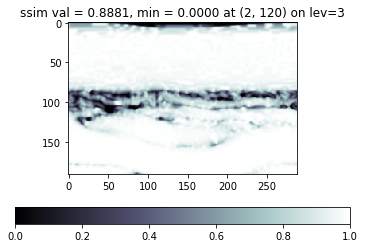

In [8]:
b2_orig = t_differ.plot_ssim_mat(ssim_type = "ssim_fp_fast2", return_mat = True)

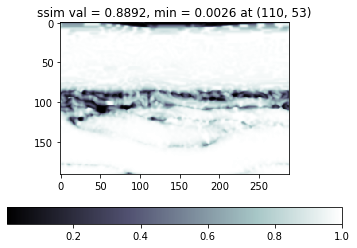

In [312]:
b_orig = t_differ.plot_ssim_mat(ssim_type = "ssim_fp", return_mat = True)

In [313]:
b3 = b_orig[3]

In [314]:
b3_f3 = b2_orig[3]

In [315]:
b3[0,0:10]

array([0.0305976 , 0.03786224, 0.04641892, 0.05342086, 0.05715095,
       0.0584116 , 0.05868464, 0.05872158, 0.05872158, 0.05872158])

In [316]:
b3_f3[0,0:10]

array([0.0230998 , 0.03150093, 0.04183651, 0.04999088, 0.05413637,
       0.05549502, 0.05578141, 0.05582016, 0.05582016, 0.05582016])

In [292]:
for i in range(len(b_orig)):
    print(b_orig[i].mean())

0.9298646182793412
0.9338080289533953
0.9128888569153867
0.8891553677069095
0.9219447483593617
0.950433032485933
0.9567155719435868
0.9618682707072592
0.953132348868878
0.9625894838900138
0.9482154284299135
0.9569606959244498
0.9708709746288721
0.975169355182279
0.9742390779069423
0.9637309126764998
0.9633171294886109
0.953864587414013
0.9564010347766368
0.9599767960584688
0.9542202317787117
0.9602051704372374
0.9648150615979004
0.9685645037609123
0.9717624962521593
0.9770243143044053
0.9799167110059246
0.9812655499504281
0.9726292660009529
0.9753710626538508


In [293]:
#let's just look at level 3
t3_orig = t_col["T"].sel(collection="orig").isel(time=0).isel(lev=3).compute().data
t3_comp = t_col["T"].sel(collection="comp").isel(time=0).isel(lev=3).compute().data

In [294]:
b3 = b_orig[3]

In [295]:
ind1 = (110, 53)
b3[ind1]

0.0025944135995811394

In [296]:
ind2 = (10,53)
b3[ind2]

0.9631049674000072

In [217]:
ind3 = (0,245)
b3[ind3]

0.0026618154102974957

In [218]:
import numpy as np
from math import exp, pi, sqrt

a1 = t3_orig
a2 = t3_comp
a1 = a1.astype('float64')
a2 = a2.astype('float64')
smin = min(np.nanmin(a1), np.nanmin(a2))
smax = max(np.nanmax(a1), np.nanmax(a2))
r = smax - smin
print("smin = ", smin, " smax = ", smax, " r= ", r)
sc_a1 = (a1 - smin) / r
sc_a2 = (a2 - smin) / r
sc_a1 = np.round(sc_a1 * 255) / 255
sc_a2 = np.round(sc_a2 * 255) / 255

smin =  182.875  smax =  238.73638916015625  r=  55.86138916015625


In [219]:
my_eps = 1.0e-8
sigma = 1.5
n=11
k=5
def oned_gauss(n, sigma):
        r = range(-int(n / 2), int(n / 2) + 1)
        return [(1 / (sigma * sqrt(2 * pi))) * exp(-float(x) ** 2 / (2 * sigma ** 2)) for x in r]
g_w = np.array(oned_gauss(n, sigma))
gg_w = np.outer(g_w, g_w)


In [220]:
#ind1
a1_win = sc_a1[105:116, 48:59]
a2_win = sc_a2[105:116, 48:59]
Wt = gg_w
##ind2
#a1_win = sc_a1[5:16, 48:59]
#a2_win = sc_a2[5:16, 48:59]
#Wt = gg_w
##ind3
a1_win = sc_a1[0:6, 240:251]
a2_win = sc_a2[0:6, 240:251]
Wt = gg_w[5:11,0:11]

In [221]:
indices1 = ~np.isnan(a1_win)
indices2 = ~np.isnan(a2_win)
a1_mu = np.average(a1_win[indices1], weights=Wt[indices1])
a2_mu = np.average(a2_win[indices2], weights=Wt[indices2])
a1_std_sq = (
                            np.average((a1_win[indices1] * a1_win[indices1]), weights=Wt[indices1])
                            - a1_mu * a1_mu
                        )
a2_std_sq = (
                            np.average((a2_win[indices2] * a2_win[indices2]), weights=Wt[indices2])
                            - a2_mu * a2_mu
                        )
a1a2_cov = (
                            np.average(
                                (a1_win[indices1] * a2_win[indices2]),
                                weights=Wt[indices1],
                            )
                            - a1_mu * a2_mu
                        )
print("a1_mu = ", a1_mu)
print("a2_mu = ", a2_mu)
print("a1_std_sq = ", a1_std_sq)
print("a2_std_sq = ", a2_std_sq)
print("a1a2_cov = ", a1a2_cov)

a1_mu =  0.9977264149010838
a2_mu =  0.996078431372549
a1_std_sq =  3.746830793738276e-06
a2_std_sq =  -3.3306690738754696e-16
a1a2_cov =  -2.220446049250313e-16


In [222]:
C1 = C2 = my_eps
ssim_t1 = 2 * a1_mu * a2_mu + C1
ssim_b1 = a1_mu * a1_mu + a2_mu * a2_mu + C1
ssim_t2 = 2 * a1a2_cov + C2
ssim_b2 = a1_std_sq + a2_std_sq + C2
print("ssim_t1 = ", ssim_t1)
print("ssim_b1 = ", ssim_b1)
print("ssim_t2 = ", ssim_t2)
print("ssim_b2 = ", ssim_b2)

ssim_t1 =  1.9876275345872572
ssim_b1 =  1.9876302504369674
ssim_t2 =  9.99999955591079e-09
ssim_b2 =  3.756830793405209e-06


In [223]:
ssim_1 = ssim_t1 / ssim_b1
ssim_2 = ssim_t2 / ssim_b2
print("ssim_1 = ", ssim_1)
print("ssim_2 = ", ssim_2)
s = ssim_1 * ssim_2
print("s = ", s)

ssim_1 =  0.9999986336242822
ssim_2 =  0.0026618179273511394
s =  0.002661814290307758


In [224]:
print(b3[ind1])
print(b3[ind2])
print(b3[ind3])


0.0025944135995811394
0.9631049674000072
0.0026618154102974957


In [200]:
print("a1_win_std = ", a1_win.std())
print("a2_win_std = ", a2_win.std())
print("a1_win_mean = ", a1_win.mean())
print("a2_win_mean = ", a2_win.mean())
print (f"a1 at {ind1} = ",a1[ind1])
print (f"a2 at {ind1} = ",a2[ind1])
print (f"sc_a1 at {ind1} = ",sc_a1[ind1])
print (f"sc_a2 at {ind1} = ",sc_a2[ind1])


a1_win_std =  0.0014614823382351515
a2_win_std =  1.1102230246251565e-16
a1_win_mean =  0.996732026143791
a2_win_mean =  0.9960784313725491
a1 at (110, 53) =  216.9467315673828
a2 at (110, 53) =  216.9375
sc_a1 at (110, 53) =  0.611764705882353
sc_a2 at (110, 53) =  0.6078431372549019


In [201]:
np.unique(a2_win)

array([0.99607843])

In [202]:
np.unique(a1_win)

array([0.99607843, 1.        ])

In [203]:
np.min(sc_a1[np.nonzero(sc_a1)])


0.00392156862745098

In [204]:
np.min(sc_a1[np.nonzero(sc_a2)])


0.00392156862745098

In [205]:
a1_win

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
        0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
        0.99607843],
       [0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
        0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
        0.99607843],
       [0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
        0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
        0.99607843],
       [0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
        0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
        0.99607843],
       [0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
        0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
        0.99607843]])

In [317]:
cloud_col = ldcpy.open_datasets(
    ["CLOUD"],
    [
        "../../../data/cam-fv/cam-fv.CLOUD.3months.nc",
        "../../../data/cam-fv/c.fpzip.cam-fv.CLOUD.3months.nc",
    ],
    ["orig", "comp"],
    chunks={"time": 1},
)

dataset size in GB 0.04



In [327]:
c_orig = cloud_col["CLOUD"].sel(collection="orig").isel(time=0).compute()
c_comp = cloud_col["CLOUD"].sel(collection="comp").isel(time=0).compute()
c_differ = ldcpy.calcs.Diffcalcs(c_orig, c_comp)

In [328]:
%%time
sfp = c_differ.get_diff_calc('ssim_fp')
sfp

CPU times: user 908 ms, sys: 7.07 ms, total: 915 ms
Wall time: 914 ms


0.9984415138039057

In [329]:
%%time
sfp = c_differ.get_diff_calc('ssim_fp_fast2')
sfp

CPU times: user 904 ms, sys: 6.55 ms, total: 911 ms
Wall time: 910 ms


0.998506105632757

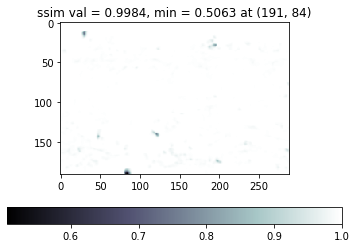

In [321]:
c_ssim_mats = c_differ.plot_ssim_mat(ssim_type = "ssim_fp", return_mat = True)

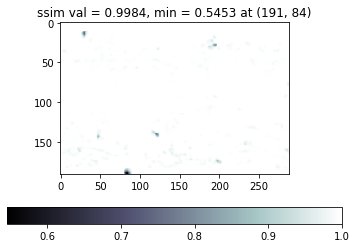

In [323]:
c2_ssim_mats = c_differ.plot_ssim_mat(ssim_type = "ssim_fp_fast2", return_mat = True)

In [322]:
for i in range(len(c_ssim_mats)):
    print(c_ssim_mats[i].mean())

1.0
1.0
0.9999945579336562
0.9999863075339301
0.9999645156806679
0.9999998761254476
0.9999908267523646
0.9999433233414297
0.9997743067379835
0.9997858245863741
0.9994430199096952
0.9993804923613221
0.9984415138039057
0.9985431261495231
0.9987848971205854
0.9989945723737227
0.9990480765605659
0.9992066587691488
0.999174891023137
0.9992400681618896
0.9992455236287883
0.9991583889324516
0.999055166356805
0.9988546975085154
0.9988777033245405
0.9987492305071063
0.9989619602588521
0.9990710074872529
0.9989691038257177
0.9990971631153388


In [ ]:
c12_ssim = c_ssim_mats[12]

In [ ]:
c12_orig = cloud_col["CLOUD"].sel(collection="orig").isel(time=0).isel(lev=12).compute().data
c12_comp = cloud_col["CLOUD"].sel(collection="comp").isel(time=0).isel(lev=12).compute().data

In [ ]:
ind = (13,26)

In [ ]:
print(c12_ssim[ind])
print(c12_orig[ind])
print(c12_comp[ind])
      

In [ ]:
import numpy as np
from math import exp, pi, sqrt

a1 = c12_orig
a2 = c12_comp
a1 = a1.astype('float64')
a2 = a2.astype('float64')
smin = min(np.nanmin(a1), np.nanmin(a2))
smax = max(np.nanmax(a1), np.nanmax(a2))
r = smax - smin
print("smin = ", smin, " smax = ", smax, " r= ", r)
sc_a1 = (a1 - smin) / r
sc_a2 = (a2 - smin) / r
sc_a1 = np.round(sc_a1 * 255) / 255
sc_a2 = np.round(sc_a2 * 255) / 255

In [ ]:
my_eps = 1.0e-15
sigma = 1.5
n=11
k=5
def oned_gauss(n, sigma):
        r = range(-int(n / 2), int(n / 2) + 1)
        return [(1 / (sigma * sqrt(2 * pi))) * exp(-float(x) ** 2 / (2 * sigma ** 2)) for x in r]
g_w = np.array(oned_gauss(n, sigma))
gg_w = np.outer(g_w, g_w)


In [ ]:
a1_win = sc_a1[8:19, 21:32]
a2_win = sc_a2[8:19, 21:32]
Wt = gg_w

In [ ]:
indices1 = ~np.isnan(a1_win)
indices2 = ~np.isnan(a2_win)
a1_mu = np.average(a1_win[indices1], weights=Wt[indices1])
a2_mu = np.average(a2_win[indices2], weights=Wt[indices2])
a1_std_sq = (
                            np.average((a1_win[indices1] * a1_win[indices1]), weights=Wt[indices1])
                            - a1_mu * a1_mu
                        )
a2_std_sq = (
                            np.average((a2_win[indices2] * a2_win[indices2]), weights=Wt[indices2])
                            - a2_mu * a2_mu
                        )
a1a2_cov = (
                            np.average(
                                (a1_win[indices1] * a2_win[indices2]),
                                weights=Wt[indices1],
                            )
                            - a1_mu * a2_mu
                        )
print("a1_mu = ", a1_mu)
print("a2_mu = ", a2_mu)
print("a1_std_sq = ", a1_std_sq)
print("a2_std_sq = ", a2_std_sq)
print("a1a2_cov = ", a1a2_cov)

In [ ]:
C1 = C2 = my_eps
ssim_t1 = 2 * a1_mu * a2_mu + C1
ssim_b1 = a1_mu * a1_mu + a2_mu * a2_mu + C1
ssim_t2 = 2 * a1a2_cov + C2
ssim_b2 = a1_std_sq + a2_std_sq + C2
print("ssim_t1 = ", ssim_t1)
print("ssim_b1 = ", ssim_b1)
print("ssim_t2 = ", ssim_t2)
print("ssim_b2 = ", ssim_b2)

In [ ]:
ssim_1 = ssim_t1 / ssim_b1
ssim_2 = ssim_t2 / ssim_b2
print("ssim_1 = ", ssim_1)
print("ssim_2 = ", ssim_2)
s = ssim_1 * ssim_2
print("s = ", s)

In [ ]:
print(c12_ssim[ind])

In [ ]:
a2_win

In [ ]:
a1_win

In [ ]:
c12_orig[8:19, 21:32]

In [ ]:
c12_comp[8:19, 21:32]

In [9]:
prect_col = ldcpy.open_datasets(["PRECT"],
    ["../../../data/cam-fv/orig.PRECT.60days.nc",
     "../../../data/cam-fv/zfp1e-7.PRECT.60days.nc",
    "../../../data/cam-fv/zfp1e-9.PRECT.60days.nc",
     "../../../data/cam-fv/zfp1e-11.PRECT.60days.nc"],
     [ "orig","zfp1e-7", "zfp1e-9", "zfp1e-11"],)


dataset size in GB 0.05



In [10]:
p_orig = prect_col["PRECT"].sel(collection="orig").isel(time=0).compute()
p_comp = prect_col["PRECT"].sel(collection="zfp1e-9").isel(time=0).compute()
p_differ = ldcpy.calcs.Diffcalcs(p_orig, p_comp)

In [11]:
%%time
sfp = p_differ.get_diff_calc('ssim_fp')
sfp

CPU times: user 36.4 ms, sys: 2.81 ms, total: 39.2 ms
Wall time: 38.3 ms


0.9941115324334332

In [12]:
%%time
sfp = p_differ.get_diff_calc('ssim_fp_fast2')
sfp

CPU times: user 37 ms, sys: 1.53 ms, total: 38.5 ms
Wall time: 37.5 ms


0.992536228442089

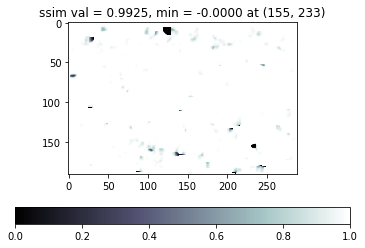

In [13]:
p_ssim_mat = p_differ.plot_ssim_mat(ssim_type = "ssim_fp_fast2", return_mat = True)
p_ssim_mat = p_ssim_mat[0]

In [14]:
indp = (155,233)
p_ssim_mat[indp]

-3.785607386823e-10

In [357]:
import numpy as np
from math import exp, pi, sqrt

p_a1 = p_orig.data
p_a2 = p_comp.data
p_a1 = p_a1.astype('float64')
p_a2 = p_a2.astype('float64')
smin = min(np.nanmin(p_a1), np.nanmin(p_a2))
smax = max(np.nanmax(p_a1), np.nanmax(p_a2))
r = smax - smin
print("smin = ", smin, " smax = ", smax, " r= ", r)
p_sc_a1 = (p_a1 - smin) / r
p_sc_a2 = (p_a2 - smin) / r
p_sc_a1 = np.round(p_sc_a1 * 255) / 255
p_sc_a2 = np.round(p_sc_a2 * 255) / 255

smin =  -3.055902197957039e-10  smax =  1.1832380550913513e-06  r=  1.183543645311147e-06


In [358]:
my_eps = 1.0e-8
sigma = 1.5
n=11
k=5
def oned_gauss(n, sigma):
        r = range(-int(n / 2), int(n / 2) + 1)
        return [(1 / (sigma * sqrt(2 * pi))) * exp(-float(x) ** 2 / (2 * sigma ** 2)) for x in r]
g_w = np.array(oned_gauss(n, sigma))
gg_w = np.outer(g_w, g_w)


In [359]:
p_a1_win = p_sc_a1[150:161, 228:239]
p_a2_win = p_sc_a2[150:161, 228:239]
Wt = gg_w

In [360]:
p_indices1 = ~np.isnan(p_a1_win)
p_indices2 = ~np.isnan(p_a2_win)
a1_mu = np.average(p_a1_win[p_indices1], weights=Wt[p_indices1])
a2_mu = np.average(p_a2_win[p_indices2], weights=Wt[p_indices2])
a1_std_sq = (
                            np.average((p_a1_win[p_indices1] * p_a1_win[p_indices1]), weights=Wt[p_indices1])
                            - a1_mu * a1_mu
                        )
a2_std_sq = (
                            np.average((p_a2_win[p_indices2] * p_a2_win[p_indices2]), weights=Wt[p_indices2])
                            - a2_mu * a2_mu
                        )
a1a2_cov = (
                            np.average(
                                (p_a1_win[p_indices1] * p_a2_win[p_indices2]),
                                weights=Wt[p_indices1],
                            )
                            - a1_mu * a2_mu
                        )
print("a1_mu = ", a1_mu)
print("a2_mu = ", a2_mu)
print("a1_std_sq = ", a1_std_sq)
print("a2_std_sq = ", a2_std_sq)
print("a1a2_cov = ", a1a2_cov)

a1_mu =  4.6901021215831416e-05
a2_mu =  4.147316071189261e-09
a1_std_sq =  1.8172586760432944e-07
a2_std_sq =  1.626396739266847e-11
a1a2_cov =  -1.9451335904360611e-13


In [361]:
C1 = C2 = 1e-8
ssim_t1 = 2 * a1_mu * a2_mu + C1
ssim_b1 = a1_mu * a1_mu + a2_mu * a2_mu + C1
ssim_t2 = 2 * a1a2_cov + C2
ssim_b2 = a1_std_sq + a2_std_sq + C2
print("ssim_t1 = ", ssim_t1)
print("ssim_b1 = ", ssim_b1)
print("ssim_t2 = ", ssim_t2)
print("ssim_b2 = ", ssim_b2)

ssim_t1 =  1.0000389026718088e-08
ssim_b1 =  1.21997058082881e-08
ssim_t2 =  9.999610973281913e-09
ssim_b2 =  1.9174213157172212e-07


In [362]:
ssim_1 = ssim_t1 / ssim_b1
ssim_2 = ssim_t2 / ssim_b2
print("ssim_1 = ", ssim_1)
print("ssim_2 = ", ssim_2)
s = ssim_1 * ssim_2
print("s = ", s)

ssim_1 =  0.8197237854640834
ssim_2 =  0.05215134979106826
s =  0.04274970186779601


In [133]:
np.min(p_sc_a1[np.nonzero(p_sc_a1)])


0.00392156862745098

In [135]:
p_a2_win

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.

In [139]:
p_a2_win.mean()

3.2409658078107274e-05

In [17]:
for i in range (1):
    print(i)

0
